In [1]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
time_series = pd.read_csv('C:/Users/polina/Desktop/miau/time_series/time_series_60min.csv')
weather_data = pd.read_csv('C:/Users/polina/Desktop/miau/weather_data/weather_data.csv')

In [1]:
# Обработка time_series
mask = time_series.columns.str.startswith(('FR', 'AT','utc'))
time_series = time_series.loc[:, mask]
cols_to_drop = time_series.columns[time_series.columns.str.contains('load|price', case=False, na=False)]
time_series = time_series.drop(columns=cols_to_drop)
time_series['utc_timestamp'] = pd.to_datetime(time_series['utc_timestamp'], format='ISO8601')
time_series

NameError: name 'time_series' is not defined

In [5]:

# Обработка weather_data
mask = weather_data.columns.str.startswith(('FR', 'AT','utc'))
weather_data = weather_data.loc[:, mask]
col_to_drop = weather_data.columns[weather_data.columns.str.contains('radiation', case=False, na=False)]
weather_data = weather_data.drop(columns=col_to_drop)
weather_data['utc_timestamp'] = pd.to_datetime(weather_data['utc_timestamp'], format='ISO8601')
weather_data

,utc_timestamp,AT_temperature,FR_temperature
0,1980-01-01 00:00:00+00:00,-3.640,-0.537
1,1980-01-01 01:00:00+00:00,-3.803,-0.489
2,1980-01-01 02:00:00+00:00,-3.969,-0.391
3,1980-01-01 03:00:00+00:00,-4.076,-0.354
4,1980-01-01 04:00:00+00:00,-4.248,-0.354
...,...,...,...
350635,2019-12-31 19:00:00+00:00,-1.386,2.048
350636,2019-12-31 20:00:00+00:00,-1.661,1.995
350637,2019-12-31 21:00:00+00:00,-1.986,2.107
350638,2019-12-31 22:00:00+00:00,-2.184,2.280


In [6]:
# Фильтрация по дате
start_date = pd.Timestamp('2014-12-31 23:00:00+00:00')
end_date = pd.Timestamp('2020-09-30 23:00:00+00:00')
mask = (weather_data['utc_timestamp'] >= start_date) & (weather_data['utc_timestamp'] <= end_date)
weather_data = weather_data.loc[mask]
weather_data

,utc_timestamp,AT_temperature,FR_temperature
306815,2014-12-31 23:00:00+00:00,-6.495,-1.577
306816,2015-01-01 00:00:00+00:00,-6.503,-1.670
306817,2015-01-01 01:00:00+00:00,-6.458,-1.768
306818,2015-01-01 02:00:00+00:00,-6.253,-1.841
306819,2015-01-01 03:00:00+00:00,-5.908,-1.908
...,...,...,...
350635,2019-12-31 19:00:00+00:00,-1.386,2.048
350636,2019-12-31 20:00:00+00:00,-1.661,1.995
350637,2019-12-31 21:00:00+00:00,-1.986,2.107
350638,2019-12-31 22:00:00+00:00,-2.184,2.280


In [ ]:
data = weather_data.merge(time_series, how='left', on='utc_timestamp')
data

,utc_timestamp,AT_temperature,FR_temperature,AT_solar_generation_actual,AT_wind_onshore_generation_actual,FR_solar_generation_actual,FR_wind_onshore_generation_actual
0,2014-12-31 23:00:00+00:00,-6.495,-1.577,NaN,NaN,NaN,NaN
1,2015-01-01 00:00:00+00:00,-6.503,-1.670,NaN,69.0,NaN,NaN
2,2015-01-01 01:00:00+00:00,-6.458,-1.768,NaN,64.0,NaN,1464.0
3,2015-01-01 02:00:00+00:00,-6.253,-1.841,NaN,65.0,NaN,1543.0
4,2015-01-01 03:00:00+00:00,-5.908,-1.908,NaN,64.0,NaN,1579.0
...,...,...,...,...,...,...,...
43820,2019-12-31 19:00:00+00:00,-1.386,2.048,0.0,1800.0,0.0,2695.0
43821,2019-12-31 20:00:00+00:00,-1.661,1.995,0.0,1957.0,0.0,2831.0
43822,2019-12-31 21:00:00+00:00,-1.986,2.107,0.0,2028.0,0.0,3031.0
43823,2019-12-31 22:00:00+00:00,-2.184,2.280,0.0,1944.0,0.0,3334.0


In [ ]:
# Анализ пропущенных значений
missing = data.isna().sum()
percent = data.isna().mean() * 100
missing, percent

(utc_timestamp                         0
 AT_temperature                        0
 FR_temperature                        0
 AT_solar_generation_actual           56
 AT_wind_onshore_generation_actual    49
 FR_solar_generation_actual           14
 FR_wind_onshore_generation_actual     7
 dtype: int64,
 utc_timestamp                        0.000000
 AT_temperature                       0.000000
 FR_temperature                       0.000000
 AT_solar_generation_actual           0.127781
 AT_wind_onshore_generation_actual    0.111808
 FR_solar_generation_actual           0.031945
 FR_wind_onshore_generation_actual    0.015973
 dtype: float64)

In [11]:
# Заполнение пропущенных значений
data = data.ffill().bfill()
data

,utc_timestamp,AT_temperature,FR_temperature,AT_solar_generation_actual,AT_wind_onshore_generation_actual,FR_solar_generation_actual,FR_wind_onshore_generation_actual
0,2014-12-31 23:00:00+00:00,-6.495,-1.577,2.0,69.0,385.0,1464.0
1,2015-01-01 00:00:00+00:00,-6.503,-1.670,2.0,69.0,385.0,1464.0
2,2015-01-01 01:00:00+00:00,-6.458,-1.768,2.0,64.0,385.0,1464.0
3,2015-01-01 02:00:00+00:00,-6.253,-1.841,2.0,65.0,385.0,1543.0
4,2015-01-01 03:00:00+00:00,-5.908,-1.908,2.0,64.0,385.0,1579.0
...,...,...,...,...,...,...,...
43820,2019-12-31 19:00:00+00:00,-1.386,2.048,0.0,1800.0,0.0,2695.0
43821,2019-12-31 20:00:00+00:00,-1.661,1.995,0.0,1957.0,0.0,2831.0
43822,2019-12-31 21:00:00+00:00,-1.986,2.107,0.0,2028.0,0.0,3031.0
43823,2019-12-31 22:00:00+00:00,-2.184,2.280,0.0,1944.0,0.0,3334.0


In [12]:
# Проверка стационарности ряда (ADF-тест)
from statsmodels.tsa.stattools import adfuller

data['utc_timestamp'] = pd.to_datetime(data['utc_timestamp'])
data = data.set_index('utc_timestamp')

series = data['AT_solar_generation_actual']

result = adfuller(series.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -7.484404322194542
p-value: 4.680211663432041e-11


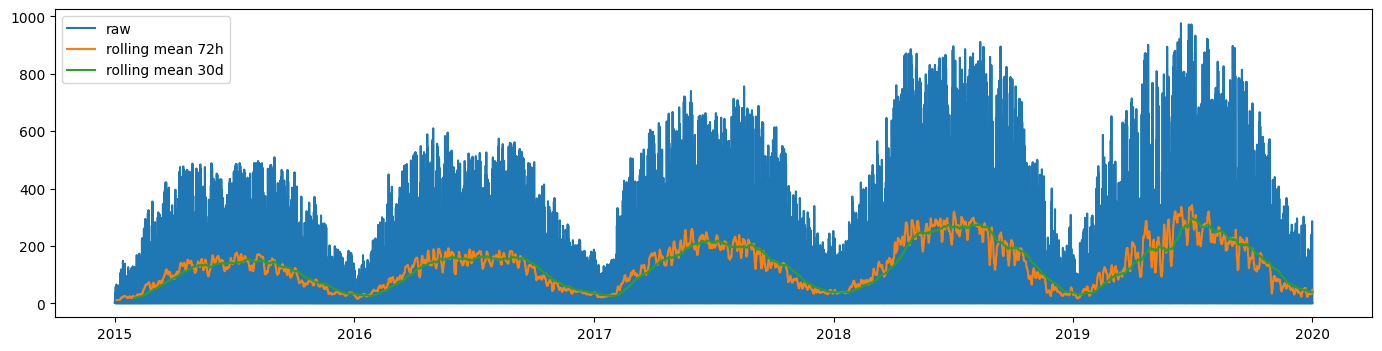

In [13]:
# Визуализация временного ряда
plt.figure(figsize=(17,4))
plt.plot(series, label='raw')
plt.plot(series.rolling(window=72).mean(), label='rolling mean 72h')
plt.plot(series.rolling(window=72*10).mean(), label='rolling mean 30d')
plt.legend()
plt.show()